# Import

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="darkgrid")

from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import nltk
from nltk.stem import WordNetLemmatizer
import re
import string
import re
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix

In [6]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Leo\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [7]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Leo\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [8]:
real = pd.read_csv('True.csv')
fake = pd.read_csv('Fake.csv')

# Data Info

### Real

In [9]:
real.head()

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"


In [10]:
real.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21417 entries, 0 to 21416
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    21417 non-null  object
 1   text     21417 non-null  object
 2   subject  21417 non-null  object
 3   date     21417 non-null  object
dtypes: object(4)
memory usage: 669.4+ KB


### Fake

In [11]:
fake.head()

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


In [12]:
fake.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23481 entries, 0 to 23480
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    23481 non-null  object
 1   text     23481 non-null  object
 2   subject  23481 non-null  object
 3   date     23481 non-null  object
dtypes: object(4)
memory usage: 733.9+ KB


Label the classes

In [13]:
real['class'] = 1
fake['class'] = 0

Combine

In [14]:
data = pd.concat([real, fake], ignore_index=True, sort=False)

Combined data

In [15]:
data.head()

,title,text,subject,date,class
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",1
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",1
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",1
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",1
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",1


# EDA

#### Class Count

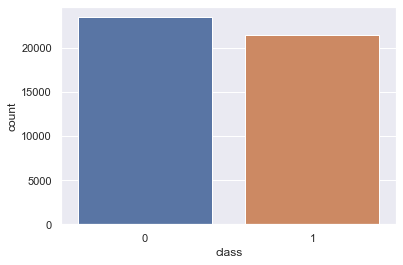

In [16]:
sns.countplot(data['class']);

The data is balanced

#### Subject and Class

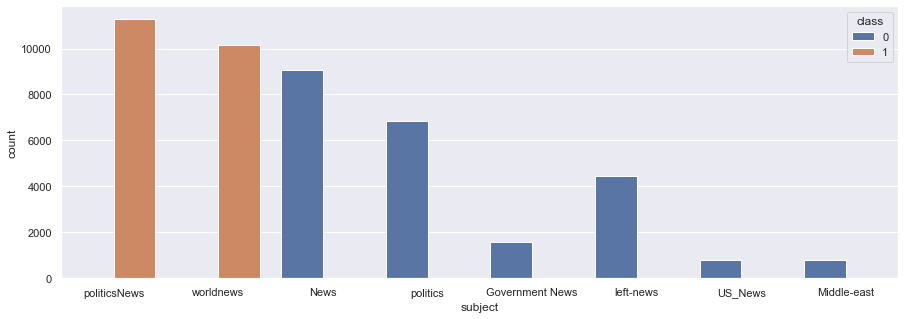

In [17]:
plt.figure(figsize=(15,5))
sns.countplot(data['subject'], hue=data['class']);

#### Word Cloud Text

In [14]:
all_text = " ".join(s for s in data['text'])
stopwords = set(STOPWORDS)

In [15]:
wordcloud = WordCloud(stopwords=stopwords,
                      background_color='black', width=1600,                            
                      height=800).generate(all_text)

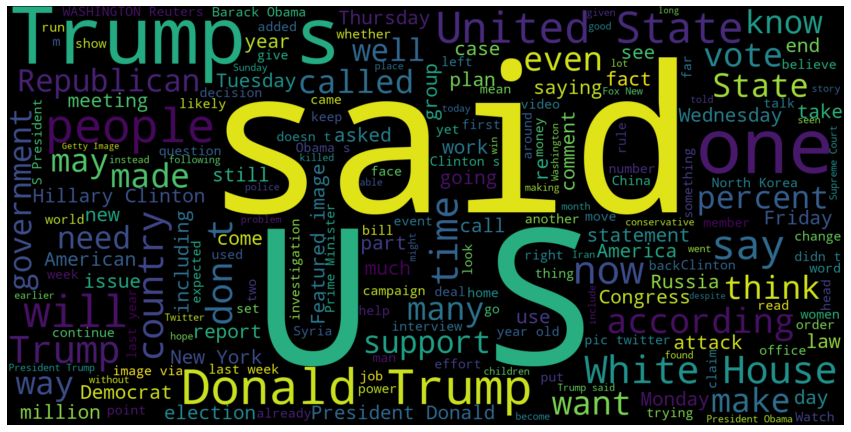

In [16]:
plt.figure(figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

#### Word Cloud Title

In [17]:
all_title = " ".join(s for s in data['title'])

In [18]:
wordcloud_title = WordCloud(stopwords=stopwords,
                      background_color='black', width=1600,                            
                      height=800).generate(all_title)

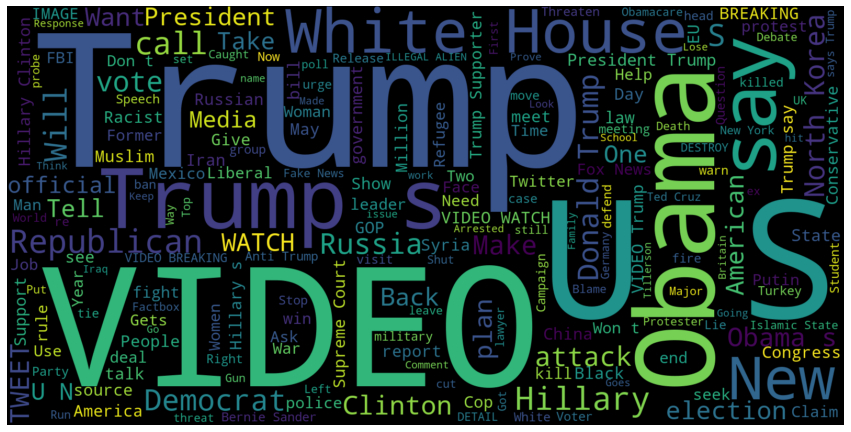

In [19]:
plt.figure(figsize=(15,10))
plt.imshow(wordcloud_title, interpolation='bilinear')
plt.axis("off")
plt.show()

#### Trump seems to be the most cited in the news

# Data Cleaning

### Clean Text

In [18]:
def clean_train_data(x):
    text = x
    text = text.lower()
    text = re.sub('\[.*?\]', '', text) # remove square brackets
    text = re.sub(r'[^\w\s]','',text) # remove punctuation
    text = re.sub('\w*\d\w*', '', text) # remove numbers
    text = re.sub(r'http\S+', '', text)
    text = re.sub('\n', '', text)
    return text

In [19]:
clean_data = data.copy()

In [20]:
clean_data['text'] = clean_data['text'].apply(lambda x: clean_train_data(x))

In [21]:
clean_data.head()

,title,text,subject,date,class
0,"As U.S. budget fight looms, Republicans flip t...",washington reuters the head of a conservative...,politicsNews,"December 31, 2017",1
1,U.S. military to accept transgender recruits o...,washington reuters transgender people will be...,politicsNews,"December 29, 2017",1
2,Senior U.S. Republican senator: 'Let Mr. Muell...,washington reuters the special counsel invest...,politicsNews,"December 31, 2017",1
3,FBI Russia probe helped by Australian diplomat...,washington reuters trump campaign adviser geo...,politicsNews,"December 30, 2017",1
4,Trump wants Postal Service to charge 'much mor...,seattlewashington reuters president donald tr...,politicsNews,"December 29, 2017",1


### Stop Words

In [22]:
stop_en = nltk.corpus.stopwords.words("english")

In [23]:
def remove_stopwords(text):
    token_text = nltk.word_tokenize(text)
    remove_stop = [word for word in token_text if word not in stop_en]
    join_text = ' '.join(remove_stop)
    return join_text

In [24]:
clean_data['text'] = clean_data['text'].apply(lambda x: remove_stopwords(x))

### Remove Reuters

In [25]:
new_text = []
for txt in clean_data['text']:
    if 'reuters' in txt:
        new_text.append(re.sub(r'^.*?reuters', '', txt))
    else:
        new_text.append(txt)

In [26]:
clean_data['text'] = new_text

In [27]:
clean_data.head()

,title,text,subject,date,class
0,"As U.S. budget fight looms, Republicans flip t...",head conservative republican faction us congr...,politicsNews,"December 31, 2017",1
1,U.S. military to accept transgender recruits o...,transgender people allowed first time enlist ...,politicsNews,"December 29, 2017",1
2,Senior U.S. Republican senator: 'Let Mr. Muell...,special counsel investigation links russia pr...,politicsNews,"December 31, 2017",1
3,FBI Russia probe helped by Australian diplomat...,trump campaign adviser george papadopoulos to...,politicsNews,"December 30, 2017",1
4,Trump wants Postal Service to charge 'much mor...,president donald trump called us postal servi...,politicsNews,"December 29, 2017",1


### Lemmatization

In [28]:
#lemm = WordNetLemmatizer()

In [29]:
#def word_lemmatizer(text):
 #   token_text = nltk.word_tokenize(text)
  #  remove_stop = [lemm.lemmatize(w) for w in token_text]
   # join_text = ' '.join(remove_stop)
    #return join_text

In [30]:
#clean_data['text'] = clean_data['text'].apply(lambda x: word_lemmatizer(x))

# Model

In [31]:
model = clean_data.copy()

In [32]:
#model['feat'] = model['subject'] + " " + model['title'] + " " + model['text']
model['feat'] = model['title'] + " " + model['text']

In [33]:
del model['title']
del model['subject']
del model['date']
del model['text']

In [34]:
model.head()

,class,feat
0,1,"As U.S. budget fight looms, Republicans flip t..."
1,1,U.S. military to accept transgender recruits o...
2,1,Senior U.S. Republican senator: 'Let Mr. Muell...
3,1,FBI Russia probe helped by Australian diplomat...
4,1,Trump wants Postal Service to charge 'much mor...


In [35]:
x = model['feat']
y = model['class']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state=0)

#### Bag of Words

In [36]:
cv = CountVectorizer().fit(x_train)

In [37]:
bag_train = cv.transform(x_train)
bag_test = cv.transform(x_test)

In [38]:
lr = LogisticRegression()
lr.fit(bag_train, y_train)

C:\Users\Leo\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

#### Test

In [39]:
pred = lr.predict(bag_test)

In [40]:
acc = accuracy_score(y_test, pred)
print("Accuracy = ", acc)

Accuracy =  0.9910913140311804


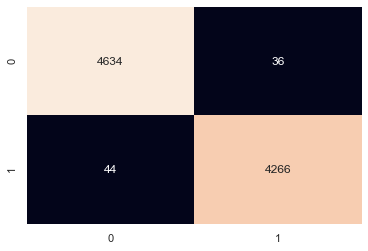

In [41]:
sns.heatmap(confusion_matrix(y_test, pred), annot=True, cbar=False, fmt='g');

#### Save Model

In [42]:
import pickle
pickle.dump(lr,open("fake_news_LR.sav", "wb"))
pickle.dump(cv, open("countvectorizer.sav", "wb"))